<a href="https://colab.research.google.com/github/LinaMariaCastro/curso-ia-para-economia/blob/main/clases/5_Aprendizaje_supervisado/1_Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inteligencia Artificial con Aplicaciones en Economía I**

- 👩‍🏫 **Profesora:** [Lina María Castro](https://www.linkedin.com/in/lina-maria-castro)  
- 📧 **Email:** [lmcastroco@gmail.com](mailto:lmcastroco@gmail.com)  
- 🎓 **Universidad:** Universidad Externado de Colombia - Facultad de Economía

# 📈 **Regresión Lineal - De la Econometría al Machine Learning**

**Objetivos de Aprendizaje**

Al finalizar este notebook, serás capaz de:

1.  **Diferenciar** entre el objetivo de **inferencia** (propio de la econometría clásica) y el de **predicción** (central en machine learning).
2.  **Implementar** la división de datos en conjuntos de **entrenamiento (train)** y **prueba (test)** como pilar fundamental para la evaluación de modelos.
3.  **Entrenar** un modelo de Regresión Lineal con `statsmodels` y `scikit-learn`, interpretando los resultados desde ambas perspectivas.
4.  **Evaluar** el desempeño predictivo de un modelo utilizando métricas como el Error Cuadrático Medio (RMSE) y el R-cuadrado sobre datos no vistos.

* **Inferencia estadística:** permite deducir información sobre una población completa basándonos en el análisis de una muestra representativa de la misma. En lugar de analizar cada elemento de la población, lo cual puede ser costoso o incluso imposible, la inferencia estadística nos permite extraer conclusiones generales con un cierto grado de confianza.

**Introducción**

Imaginemos a dos profesionales:

* **El Economista Investigador:** Su trabajo es entender el pasado. Quiere saber *por qué* la inflación subió en el último año. Para ello, construye un modelo econométrico complejo, buscando identificar las **causas** (e.g., el efecto de la tasa de cambio, el precio del petróleo). Su objetivo es la **inferencia**: quiere interpretar los coeficientes y su significancia estadística para explicar un fenómeno.

* **El Analista de Datos en un banco:** Su trabajo es anticipar qué puede pasar en el futuro. Necesita un modelo que le diga, con la mayor precisión posible, *cuál será* la inflación de los próximos meses para que el banco pueda anticipar movimientos en las tasas de interés y tomar decisiones. Su objetivo es la **predicción**. Puede que su modelo use variables menos "explicativas" teóricamente, pero si predice bien, es un buen modelo. No le importa tanto el valor exacto de un coeficiente, sino el error de su predicción.

Empezaremos con un modelo clásico para *explicar* y luego lo transformaremos en una herramienta para *predecir*, introduciendo el flujo de trabajo fundamental del Machine Learning.

## Importar Librerías

Como siempre, nuestro primer paso es cargar las herramientas que necesitaremos.

In [1]:
# Librerías para manipulación y análisis de datos
import pandas as pd
import numpy as np

# Librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para modelamiento
import statsmodels.api as sm  # Para el enfoque econométrico (inferencia)
from sklearn.datasets import fetch_california_housing # Dataset
from sklearn.model_selection import train_test_split # Para dividir los datos
from sklearn.linear_model import LinearRegression # Modelo de ML (predicción)
from sklearn.metrics import mean_squared_error, r2_score # Métricas de evaluación

# Pruebas de Supuestos
from statsmodels.stats.diagnostic import het_breuschpagan, linear_reset
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Mejorar visualización de dataframes y gráficos

In [2]:
# Que muestre todas las columnas
pd.options.display.max_columns = None
# En los dataframes, mostrar los float con dos decimales
pd.options.display.float_format = '{:,.2f}'.format

# Configuraciones para una mejor visualización
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## Carga y Exploración Inicial de los Datos (EDA)

**Dataset: Precios de Vivienda en California**

Utilizaremos un dataset clásico que busca predecir el valor mediano de las viviendas en diferentes distritos de California, basado en características de dichos distritos.

**Características del Conjunto de Datos:**

- Número de Instancias: 20.640

- Número de Atributos: 8 atributos numéricos predictivos y la variable objetivo

- Variable objetivo: es el valor mediano de la vivienda para los distritos de California, expresado en cientos de miles de USD.

Información de los Atributos:
- MedInc: ingreso mediano en el grupo de bloques (en decenas de miles de USD)
- HouseAge: mediana de la antigüedad de la vivienda en el grupo de bloques (en años).
- AveRooms: número promedio de habitaciones por hogar
- AveBedrms: número promedio de dormitorios por hogar
- Population: población del grupo de bloques
- AveOccup: número promedio de miembros del hogar
- Latitude: latitud del grupo de bloques
- Longitude: longitud del grupo de bloques

Este conjunto de datos se derivó del censo de EE. UU. de 1990.

Cada fila representa un grupo de bloques censales, el cual es la unidad geográfica más pequeña para la cual la Oficina del Censo de EE. UU. publica datos de muestra (un grupo de bloques generalmente tiene una población de 600 a 3.000 personas).

Un hogar es un grupo de personas que residen dentro de una vivienda.

In [3]:
# Cargamos el dataset desde sklearn
housing_bunch = fetch_california_housing()

# print(housing_bunch.DESCR) # Descomentar para leer la descripción

In [4]:
# Convertir a DataFrame de Pandas
df = pd.DataFrame(housing_bunch.data, columns=housing_bunch.feature_names)
df['MedHouseVal'] = housing_bunch.target # Añadimos la variable objetivo
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.33,41.00,6.98,1.02,322.00,2.56,37.88,-122.23,4.53
1,8.30,21.00,6.24,0.97,"2,401.00",2.11,37.86,-122.22,3.58
2,7.26,52.00,8.29,1.07,496.00,2.80,37.85,-122.24,3.52
3,5.64,52.00,5.82,1.07,558.00,2.55,37.85,-122.25,3.41
4,3.85,52.00,6.28,1.08,565.00,2.18,37.85,-122.25,3.42


In [8]:
df.to_excel('california_housing.xlsx', index=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
print("\nEstadísticas descriptivas:")
df.describe()


Estadísticas descriptivas:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,"20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00"
mean,3.87,28.64,5.43,1.10,"1,425.48",3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,"1,132.46",10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,"1,166.00",2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,"1,725.00",3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,"35,682.00","1,243.33",41.95,-114.31,5.00


### Visualización Rápida

Veamos la distribución de nuestra variable objetivo, `MedHouseVal`.

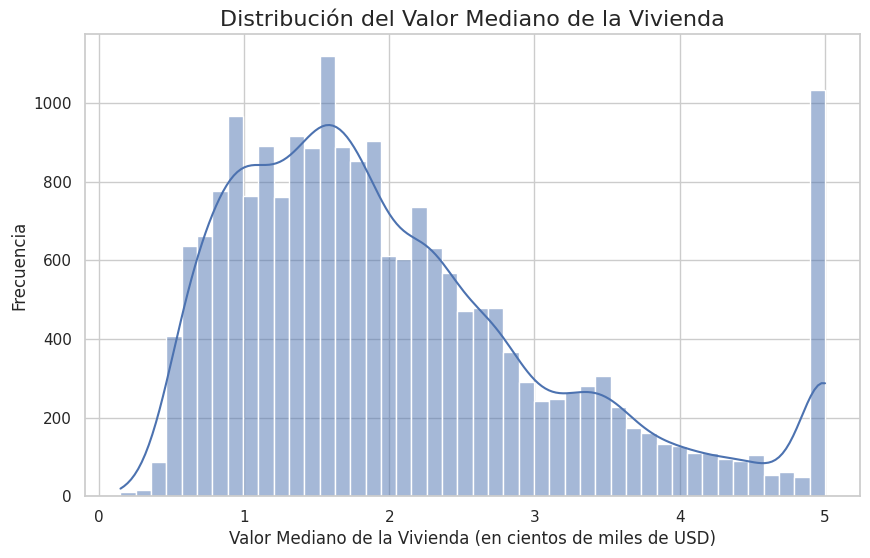

In [7]:
sns.histplot(df['MedHouseVal'], kde=True)
plt.title('Distribución del Valor Mediano de la Vivienda', fontsize=16)
plt.xlabel('Valor Mediano de la Vivienda (en cientos de miles de USD)')
plt.ylabel('Frecuencia')
plt.show()

**Observación:** La distribución está **sesgada a la derecha**. Vemos una cola larga de casas caras y una concentración de valores en el extremo superior (~5.0) que indica que los datos fueron "topeados" (censurados). Este sesgo es la primera pista de que podríamos tener problemas de normalidad y heteroscedasticidad.


Veamos la relación entre el ingreso mediano (`MedInc`), que intuimos es la variable más importante, y el valor mediano de la vivienda (`MedHouseVal`).

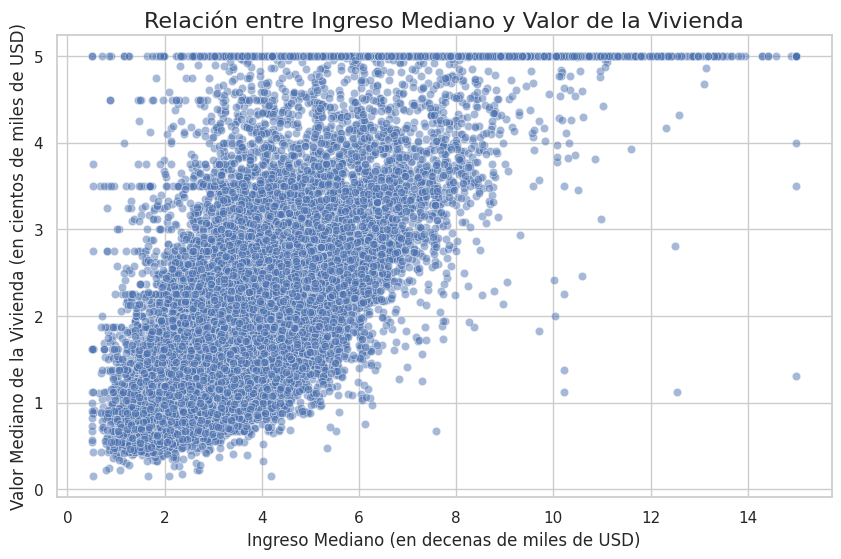

In [9]:
# Gráfico de dispersión para Ingreso vs. Valor de la Vivienda
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df, alpha=0.5)
plt.title('Relación entre Ingreso Mediano y Valor de la Vivienda', fontsize=16)
plt.xlabel('Ingreso Mediano (en decenas de miles de USD)')
plt.ylabel('Valor Mediano de la Vivienda (en cientos de miles de USD)')
plt.show()

**Observación:** Claramente existe una relación lineal positiva, como esperaríamos.

## Parte 1: El Enfoque Econométrico (INFERENCIA)

Nuestro objetivo aquí es **explicar** el precio de la vivienda. Queremos entender la relación entre las variables y cuantificar su significancia estadística. Usaremos la librería `statsmodels`, que nos da un *output* muy similar al de Stata o R.

In [10]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.33,41.00,6.98,1.02,322.00,2.56,37.88,-122.23,4.53
1,8.30,21.00,6.24,0.97,"2,401.00",2.11,37.86,-122.22,3.58
2,7.26,52.00,8.29,1.07,496.00,2.80,37.85,-122.24,3.52
3,5.64,52.00,5.82,1.07,558.00,2.55,37.85,-122.25,3.41
4,3.85,52.00,6.28,1.08,565.00,2.18,37.85,-122.25,3.42


In [11]:
# Definimos nuestras variables
# X son las variables predictoras (independientes)
X = df.drop('MedHouseVal', axis=1)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.33,41.00,6.98,1.02,322.00,2.56,37.88,-122.23
1,8.30,21.00,6.24,0.97,"2,401.00",2.11,37.86,-122.22
2,7.26,52.00,8.29,1.07,496.00,2.80,37.85,-122.24
3,5.64,52.00,5.82,1.07,558.00,2.55,37.85,-122.25
4,3.85,52.00,6.28,1.08,565.00,2.18,37.85,-122.25


In [12]:
# y es nuestra variable objetivo (dependiente)
y = df['MedHouseVal']
y.head()

,MedHouseVal
0,4.53
1,3.58
2,3.52
3,3.41
4,3.42


In [13]:
# Agregamos la constante (el intercepto)
X_con_constante = sm.add_constant(X)
X_con_constante.head()

,const,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1.00,8.33,41.00,6.98,1.02,322.00,2.56,37.88,-122.23
1,1.00,8.30,21.00,6.24,0.97,"2,401.00",2.11,37.86,-122.22
2,1.00,7.26,52.00,8.29,1.07,496.00,2.80,37.85,-122.24
3,1.00,5.64,52.00,5.82,1.07,558.00,2.55,37.85,-122.25
4,1.00,3.85,52.00,6.28,1.08,565.00,2.18,37.85,-122.25


In [14]:
# Creamos y ajustamos el modelo de Mínimos Cuadrados Ordinarios (OLS)
modelo_econometrico = sm.OLS(y, X_con_constante).fit()

In [15]:
# Mostramos el resumen completo del modelo
print(modelo_econometrico.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):               0.00
Time:                        12:42:58   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419      0.659    -56.067      0.0

#### Interpretación Económica

1.  **R-squared (0.606):** Nuestro modelo **explica** el 60.6% de la variabilidad en el precio de las viviendas.
2.  **Coeficientes (coef):**
    * **MedInc (0.4367):** Por cada aumento de $10,000 en el ingreso mediano del distrito, el valor mediano de la vivienda aumenta en `0.4367 * $100,000 = $43,670`, *ceteris paribus*.
    * **HouseAge (0.0094):** Por cada año adicional de antigüedad promedio de las casas, el valor aumenta en `0.0094 * $100,000 = $940`.
3.  **P>|t| (P-values):** Casi todas nuestras variables son **estadísticamente significativas** (p-valor cercano a cero), lo que nos da confianza en que estas relaciones no son producto del azar.

Hasta aquí, hemos hecho un buen trabajo explicando las relaciones *dentro de nuestro dataset*. Pero, ¿qué tan bueno sería este modelo para predecir el precio de una casa en un distrito **nuevo**?

### Diagnóstico de Supuestos

En el machine learning predictivo no se evalúa el cumplimiento de los supuestos del modelo de regresión lineal con el mismo rigor o propósito que en la econometría.

La razón es la diferencia fundamental en el objetivo de cada disciplina.

**El Foco de la Econometría: Inferencia**

En econometría, tu objetivo principal es la inferencia causal o, como mínimo, la explicación. Quieres entender y cuantificar la relación entre las variables. Las preguntas que buscas responder son del tipo:

- Si aumentamos el salario mínimo en un 1%, ¿en cuánto cambiará el desempleo?¿Cuál es el efecto real de un año adicional de educación sobre el salario de una persona, manteniendo todo lo demás constante?

Para que puedas confiar en que los coeficientes ($\beta$) de tu regresión representan estas relaciones de manera insesgada y eficiente, y para que los p-values y los intervalos de confianza sean válidos, los supuestos del modelo son CRÍTICOS.

**El Foco del Machine Learning: Predicción**

En machine learning, el objetivo principal es la precisión predictiva. Tu modelo es una herramienta para hacer la mejor estimación posible sobre datos nuevos y no vistos. La pregunta que buscas responder es:

- Con los datos de un nuevo cliente, ¿cuál es la probabilidad de que no pague su crédito?
- Dadas las características de una vivienda, ¿cuál será su precio de venta más probable?

En este contexto, la prueba de fuego no es si cumple con los supuestos teóricos, sino qué tan bien funciona en la práctica. La evaluación se centra en métricas de rendimiento sobre un conjunto de prueba (test set), como el Error Cuadrático Medio (RMSE) o la Precisión (Accuracy).Si un modelo de regresión lineal, a pesar de tener residuos no normales o heterocedasticidad, logra un RMSE más bajo en el test set que otro modelo más complejo, desde una perspectiva puramente predictiva, es el mejor modelo.

**Entonces, ¿los Supuestos no Importan NADA en Machine Learning?**

Si bien no son una barrera formal, un buen científico de datos los utiliza como una caja de herramientas de diagnóstico para entender por qué un modelo podría no estar funcionando bien y cómo mejorarlo.

¿Para qué sirve revisarlos?

- **Mejorar el Modelo:** Si tu regresión lineal predice mal, revisar los supuestos te puede dar pistas. Por ejemplo, si un gráfico de residuos vs. valores predichos muestra una curva (violando el supuesto de linealidad), te sugiere que necesitas añadir términos polinómicos o usar un modelo no lineal (como un árbol de decisión) para capturar mejor la relación y, por ende, mejorar tu predicción.
- **Ingeniería de Características (Feature Engineering):** Detectar heterocedasticidad (la varianza del error no es constante) podría llevarte a transformar tu variable objetivo (ej. usar $log(Precio)$ en vez de $Precio$), lo cual a menudo estabiliza la varianza y mejora el poder predictivo del modelo.
- **Interpretabilidad:** Si además de predecir quieres tener una idea de la influencia de las variables, entonces los supuestos vuelven a ganar algo de importancia, ya que un modelo que los cumple mejor suele ser más estable y sus coeficientes más fiables.


Vamos a revisar 3 supuestos clave de forma visual y práctica. Primero, calculemos los residuos de nuestro `modelo_econométrico`.

Encuentra mayor información en:
- https://www.statsmodels.org/stable/diagnostic.html
- https://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html

In [16]:
# Calcular los valores predichos
fitted_values = modelo_econometrico.fittedvalues
fitted_values

,0
0,4.13
1,3.98
2,3.68
3,3.24
4,2.41
...,...
20635,0.13
20636,0.55
20637,0.17
20638,0.32


In [17]:
# Calcular los residuos
# Residuo = Valor Observado - Valor Predicho
residuals = modelo_econometrico.resid
residuals

,0
0,0.39
1,-0.39
2,-0.16
3,0.17
4,1.01
...,...
20635,0.65
20636,0.22
20637,0.75
20638,0.53


#### Supuesto 1: Homocedasticidad de los Residuos

* **Homocedasticidad:** La varianza de los residuos debe ser constante para todos los niveles de las variables predictoras.

**¿Cómo lo revisamos?** Con un gráfico de residuos vs. valores predichos.

* **¿Qué buscamos?** Un patrón aleatorio de puntos, como una "nube" sin forma, centrada en cero.
* **¿Qué sería una mala señal?** Un patrón discernible, lo que indicaría problemas de no linealidad o heterocedasticidad (la varianza de los errores no es constante).

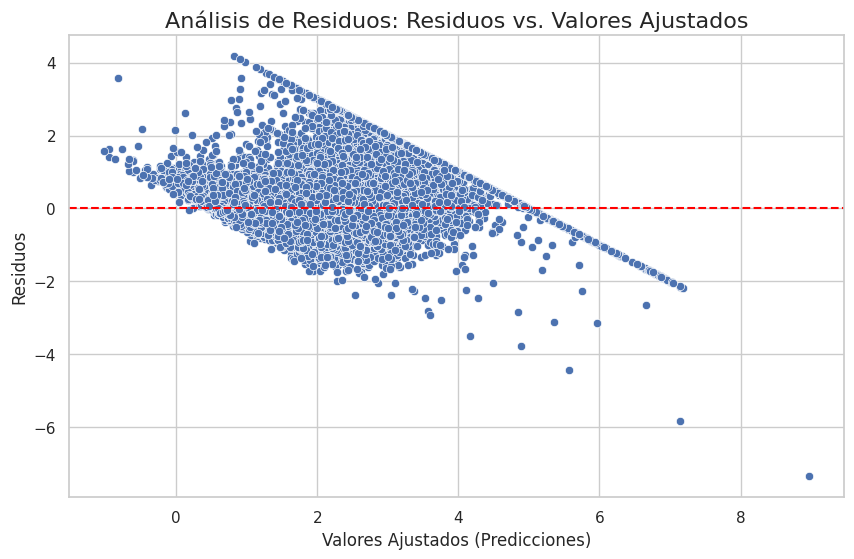

In [18]:
# Gráfico de Residuos vs. Valores Ajustados
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Análisis de Residuos: Residuos vs. Valores Ajustados', fontsize=16)
plt.xlabel('Valores Ajustados (Predicciones)')
plt.ylabel('Residuos')
plt.show()

**Interpretación:**
Vemos un patrón, indicando **heterocedasticidad**.

#### Supuesto 2: Normalidad de los Residuos

* **¿Qué significa?** Que los residuos del modelo deben seguir una distribución normal.
* **¿Cómo lo revisamos?** Con un gráfico Q-Q (Quantile-Quantile) y un histograma. El gráfico Q-Q compara los cuantiles de nuestros residuos con los de una distribución normal teórica.

* **¿Qué buscamos?** En el gráfico Q-Q, que los puntos se alineen lo más cerca posible a la línea diagonal roja. En el histograma, una forma de campana de Gauss.

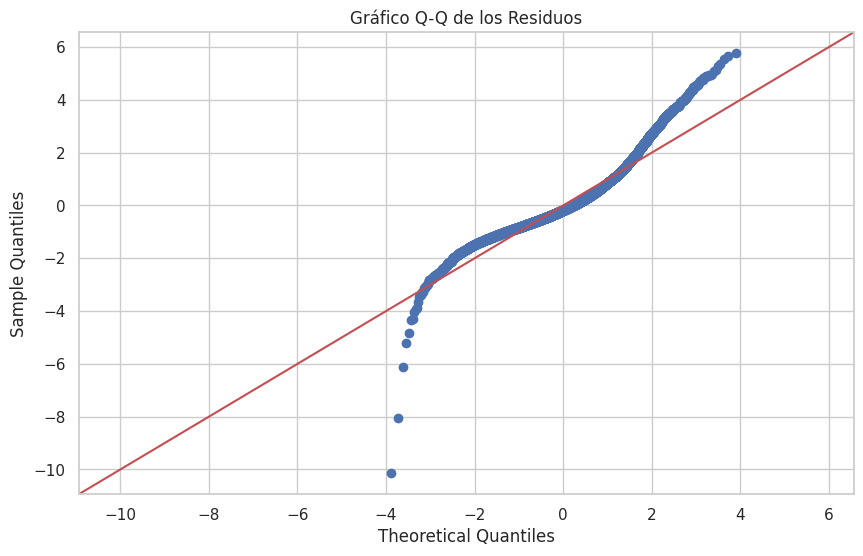

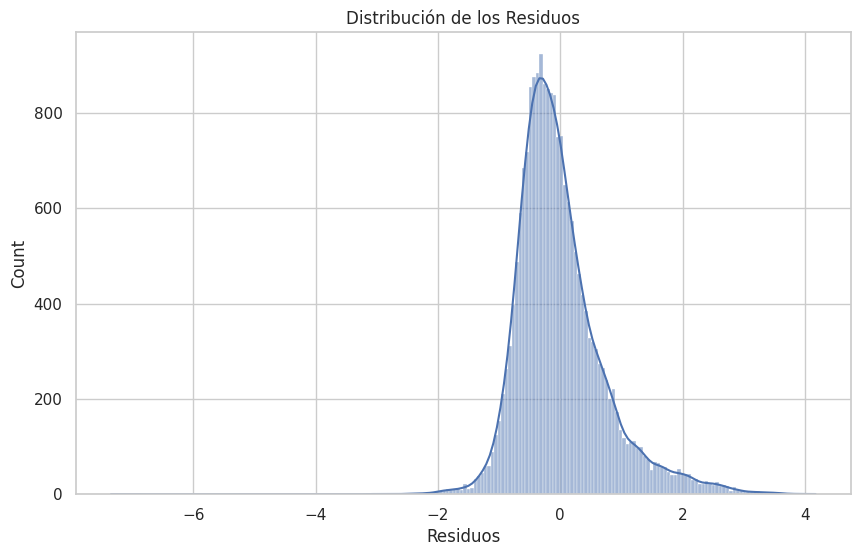

In [19]:
# Gráfico Q-Q
sm.qqplot(residuals, line='45', fit=True)
plt.title('Gráfico Q-Q de los Residuos')
plt.show()

# Histograma de los Residuos
sns.histplot(residuals, kde=True)
plt.title('Distribución de los Residuos')
plt.xlabel('Residuos')
plt.show()

**Interpretación:**
Los puntos en el gráfico Q-Q se desvían de la línea recta en las colas (especialmente en la cola derecha). El histograma también muestra una "cola" más larga hacia la derecha. Esto indica que los residuos **no son perfectamente normales**. Nuestro modelo tiende a subestimar el precio de las casas más caras, generando grandes errores positivos.

In [20]:
print("--- PRUEBAS FORMALES DE DIAGNÓSTICO ---")

# 1. Test de Normalidad (Jarque-Bera)
# H0: Los residuos son normales.
name = ['Estadístico JB', 'p-valor', 'Sesgo', 'Curtosis']
jb_test = jarque_bera(modelo_econometrico.resid)
print("Test de Normalidad (Jarque-Bera):")
print(list(zip(name, jb_test)))

# 2. Test de Heteroscedasticidad (Breusch-Pagan)
# H0: Los residuos son homocedásticos (varianza constante).
name = ['Estadístico LM', 'p-valor LM', 'Estadístico F', 'p-valor F']
bp_test = het_breuschpagan(modelo_econometrico.resid, modelo_econometrico.model.exog)
print("\nTest de Heteroscedasticidad (Breusch-Pagan):")
print(list(zip(name, bp_test)))

# 3. Test de Linealidad (Ramsey RESET)
# H0: El modelo tiene la forma funcional correcta (es lineal).
reset_test = linear_reset(modelo_econometrico, power=2, test_type='fitted', use_f=True)
print("\nTest de Linealidad (Ramsey RESET):")
print(f"Estadístico F: {reset_test.fvalue:.4f}, p-valor: {reset_test.pvalue:.4f}")

--- PRUEBAS FORMALES DE DIAGNÓSTICO ---
Test de Normalidad (Jarque-Bera):
[('Estadístico JB', np.float64(14087.595855756208)), ('p-valor', np.float64(0.0)), ('Sesgo', np.float64(1.0820115758820057)), ('Curtosis', np.float64(6.420223561742619))]

Test de Heteroscedasticidad (Breusch-Pagan):
[('Estadístico LM', np.float64(2305.0884193832717)), ('p-valor LM', np.float64(0.0)), ('Estadístico F', np.float64(324.21944722228545)), ('p-valor F', np.float64(0.0))]

Test de Linealidad (Ramsey RESET):
Estadístico F: 37.9116, p-valor: 0.0000


**Interpretación de las Pruebas Formales:**

* **Normalidad (Jarque-Bera):** El `p-valor` es `0.0`. **Rechazamos** la hipótesis nula de normalidad.
* **Heteroscedasticidad (Breusch-Pagan):** El `p-valor LM` es `0.0`. **Rechazamos** la hipótesis nula de homocedasticidad.
* **Linealidad (Ramsey RESET):** El `p-valor` es `0.0`. **Rechazamos** la hipótesis nula de que el modelo está especificado correctamente.

**Conclusión:** Las pruebas formales confirman lo que vimos visualmente. El modelo está **mal especificado** y viola todos los supuestos clave.

#### Supuesto 3: Ausencia de Multicolinealidad

* **¿Qué significa?** Que las variables predictoras no deben estar altamente correlacionadas entre sí. Si lo están, el modelo no puede distinguir el efecto individual de cada una.
* **¿Cómo lo revisamos?** Con una matriz de correlación y el Factor de Inflación de la Varianza (VIF). Un VIF > 10 es generalmente considerado una señal de alerta.

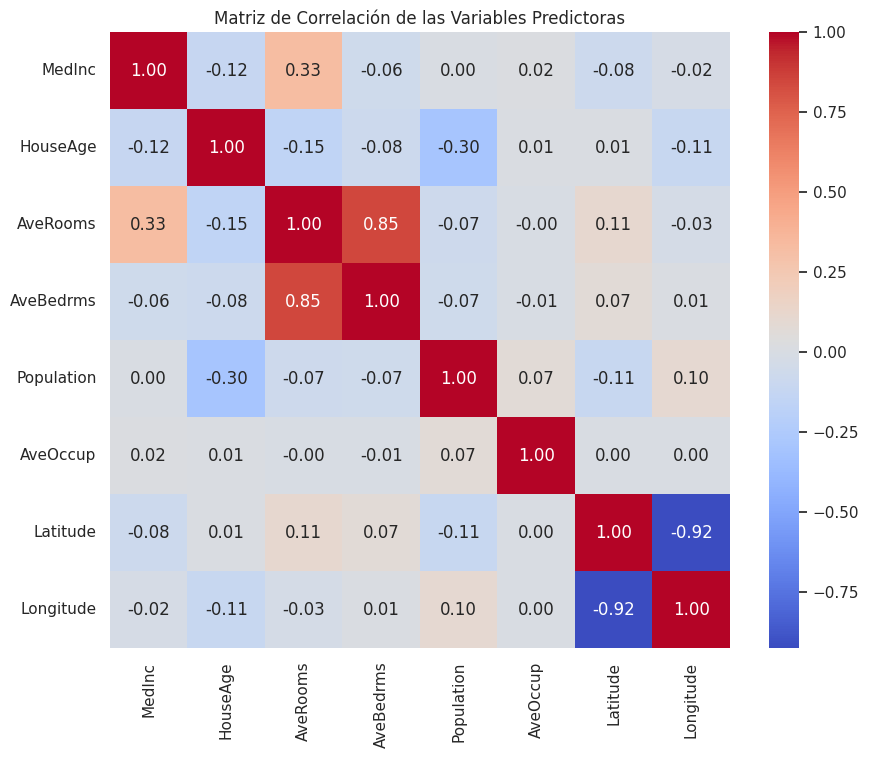

In [21]:
# Calculamos la matriz de correlación
corr_matrix = X.corr()

# Creamos un mapa de calor para visualizarla
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación de las Variables Predictoras')
plt.show()

**Interpretación:**
- Las variables `Latitude` y `Longitude` tienen una correlación negativa considerable (-0.92).
- Las variables `AveRooms` y `AveBedrms` tienen una correlación positiva alta de 0.85.

* Podríamos eliminar una de ellas o combinarlas en una nueva variable (reducción de dimensionalidad). Esto puede simplificar el modelo y, a veces, mejorar su capacidad de generalización.

In [22]:
# Función para calcular el VIF. Nota: Se calcula sobre las variables X, no sobre la constante.
def calcular_vif(X_df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X_df.columns
    vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
    return vif_data.sort_values('VIF', ascending=False)

# Calculamos el VIF para nuestras variables X
vif_results = calcular_vif(X)
print("--- Factor de Inflación de la Varianza (VIF) ---")
display(vif_results)

--- Factor de Inflación de la Varianza (VIF) ---


,feature,VIF
7,Longitude,633.71
6,Latitude,559.87
2,AveRooms,45.99
3,AveBedrms,43.59
0,MedInc,11.51
1,HouseAge,7.20
4,Population,2.94
5,AveOccup,1.10


## Parte 2: El Enfoque de Machine Learning (PREDICCIÓN)

Ahora cambiamos de sombrero. Ya no queremos explicar, queremos **predecir**. Para hacerlo, debemos evaluar nuestro modelo en datos que nunca ha visto.

### Paso clave: Dividir los Datos

Imaginen que van a presentar un examen y el profesor les da las preguntas exactas para que estudien. Seguramente sacarán una nota perfecta, pero eso no significa que hayan aprendido el tema. Simplemente **memorizaron** las respuestas.

Un modelo de machine learning puede hacer lo mismo. Si lo entrenamos y evaluamos con los mismos datos, puede "memorizar" las respuestas y parecer perfecto, pero fallará estrepitosamente cuando vea datos nuevos.

La solución es simple y poderosa: **dividimos nuestro dataset en dos partes**:
* **Conjunto de Entrenamiento (Train set):** La mayoría de los datos (usualmente 70-80%). Lo usamos para que el modelo aprenda las relaciones.
* **Conjunto de Prueba (Test set):** El resto de los datos (20-30%). Lo mantenemos **guardado bajo llave** hasta el final. Lo usaremos para evaluar qué tan bien generaliza el modelo a nuevos datos.

![Train-Test Split](https://drive.google.com/uc?id=1W8h8fB73KFlKBftFr2phxvAyzbsw8iXx)

In [23]:
# Usamos la misma X e y que antes
# La función train_test_split hace la magia por nosotros
# test_size=0.2 significa que el 20% de los datos serán para prueba
# random_state asegura que la división sea siempre la misma, para reproducibilidad
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del dataset original: {X.shape[0]} filas")
print(f"Tamaño del set de entrenamiento: {X_train.shape[0]} filas")
print(f"Tamaño del set de prueba: {X_test.shape[0]} filas")

Tamaño del dataset original: 20640 filas
Tamaño del set de entrenamiento: 16512 filas
Tamaño del set de prueba: 4128 filas


### Entrenar el Modelo

Ahora usaremos `scikit-learn`, la librería comunmente utilizada para Machine Learning en Python.

In [24]:
# 1. Creamos una instancia del modelo
modelo_ml = LinearRegression()

# 2. Entrenamos el modelo SOLAMENTE con los datos de entrenamiento
modelo_ml.fit(X_train, y_train)

# 3. Hacemos predicciones sobre el conjunto de prueba (los datos que el modelo nunca ha visto)
predicciones = modelo_ml.predict(X_test)

### Evaluar el Modelo

#### Métricas de desempeño del modelo: MSE y RMSE

Tanto el MSE como el RMSE son métricas que cuantifican qué tan "equivocado" está nuestro modelo de regresión. Ambas miden la distancia promedio entre los valores reales observados y los valores que el modelo predijo.

Recuerda que la fórmula base para cualquier error es:

$$e_i = y_i - \hat{y}_i$$

Residuo = Valor Real - Valor Predicho

**MSE: Error Cuadrático Medio (Mean Squared Error)**

El MSE es el punto de partida para evaluar una regresión. Su lógica es:
- Calcula cada residuo ($y_i - \hat{y}_i$).
- Eleva cada uno de esos residuos al cuadrado ($e_i^2$).
- Calcula el promedio (la media) de todos esos errores al cuadrado.

¿Por qué elevar al cuadrado?
- Penalizar errores grandes: Un error de 10 se convierte en 100, mientras que un error de 2 se convierte en 4. El MSE castiga de forma exponencial al modelo por estar muy equivocado en unas pocas predicciones.
- Evitar que los errores se cancelen: Si un modelo se equivoca por +10 en una casa y por -10 en otra, el error promedio simple sería 0, lo cual es engañoso. Al elevar al cuadrado, ambos errores (+10 y -10) se convierten en 100, mostrando que el modelo sí tiene un error significativo.

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

Donde:

- $n$: Es el número total de observaciones (ej. el número de casas en tu set de prueba).
- $y_i$: Es el valor real de la observación $i$.
- $\hat{y}_i$: Es el valor predicho por el modelo para la observación $i$.

Su principal desventaja es la interpretación. Si estás prediciendo precios de casas en dólares, el MSE te dará un error en "dólares al cuadrado". Esto no tiene una intuición de negocio clara.

**RMSE: Raíz del Error Cuadrático Medio (Root Mean Squared Error)**

El RMSE es la solución directa al problema de interpretación del MSE. Es, simple y llanamente, la raíz cuadrada del MSE. Devuelve la métrica a las unidades originales de la variable. Si tu variable $y$ está en dólares, tu RMSE también estará en dólares.

$$RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

El RMSE es la métrica de error en regresión más popular precisamente porque es la más fácil de interpretar. Un RMSE de USD 72,000 se traduce directamente a una frase de negocio:"En promedio, nuestro modelo se equivoca en USD 72,000 al predecir el precio de una vivienda." Esta sola frase le permite a un gerente o a un economista entender inmediatamente la precisión del modelo y decidir si es lo suficientemente bueno para sus necesidades.

In [25]:
# Calculamos las métricas de desempeño
mse = mean_squared_error(y_test, predicciones)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicciones)

print(f"Métricas de Desempeño sobre el Conjunto de Prueba:")
print(f"-------------------------------------------------")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Coeficiente de Determinación (R-cuadrado): {r2:.4f}")

Métricas de Desempeño sobre el Conjunto de Prueba:
-------------------------------------------------
Error Cuadrático Medio (MSE): 0.5559
Raíz del Error Cuadrático Medio (RMSE): 0.7456
Coeficiente de Determinación (R-cuadrado): 0.5758


#### Interpretación

1.  **RMSE (Root Mean Squared Error):** Es la métrica más intuitiva. Nos dice, en promedio, **cuánto se equivoca nuestro modelo en las unidades de la variable objetivo**.
    * Nuestro modelo, al predecir el valor de una vivienda en un distrito que no ha visto antes, se equivoca en promedio en `0.7456 * $100,000 = $74,560`. Esto nos da una medida tangible y accionable de la precisión del modelo.
2.  **R-cuadrado (en test):**
    * Nuestro modelo es capaz de explicar el 57.58% de la variabilidad en los precios de las viviendas del conjunto de prueba.

#### El Pecado de No Dividir

Vamos a ver la diferencia entre los resultados del daset de entrenamiento y el de prueba

In [26]:
# 1. Creamos una instancia del modelo
modelo_ml = LinearRegression()

# 2. Entrenamos el modelo SOLAMENTE con los datos de entrenamiento
modelo_ml.fit(X_train, y_train)

# 3. Hacemos predicciones sobre el conjunto de prueba (los datos que el modelo nunca ha visto)
predicciones_train = modelo_ml.predict(X_train)
predicciones_test = modelo_ml.predict(X_test)

In [ ]:
# Calculamos las métricas de desempeño para entrenamiento
mse_train = mean_squared_error(y_train, predicciones_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, predicciones_train)
print(f"Métricas de Desempeño sobre el Conjunto de Entranamiento:")
print(f"-------------------------------------------------")
print(f"Error Cuadrático Medio (MSE): {mse_train:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse_train:.4f}")
print(f"Coeficiente de Determinación (R-cuadrado): {r2_train:.4f}")

In [27]:
# Calculamos las métricas de desempeño para prueba
mse_test = mean_squared_error(y_test, predicciones_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, predicciones_test)

print(f"Métricas de Desempeño sobre el Conjunto de Prueba:")
print(f"-------------------------------------------------")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Coeficiente de Determinación (R-cuadrado): {r2:.4f}")

Métricas de Desempeño sobre el Conjunto de Prueba:
-------------------------------------------------
Error Cuadrático Medio (MSE): 0.5559
Raíz del Error Cuadrático Medio (RMSE): 0.7456
Coeficiente de Determinación (R-cuadrado): 0.5758


Ahora vamos a entrenar y evaluar el modelo con **todos** los datos.

In [ ]:
# 1. Entrenamos el modelo con TODOS los datos
modelo_tramposo = LinearRegression()
modelo_tramposo.fit(X, y) # Usando X e y completas

# 2. "Predecimos" sobre los mismos datos que usamos para entrenar
predicciones_tramposas = modelo_tramposo.predict(X)

# 3. Calculamos el R-cuadrado
r2_tramposo = r2_score(y, predicciones_tramposas)
mse_tramposo = mean_squared_error(y, predicciones_tramposas)
rmse_tramposo = np.sqrt(mse_tramposo)

print("Comparación:")
print("--------------------------")
print(f"R-cuadrado evaluado en test: {r2_test:.4f}")
print(f"R-cuadrado evaluado en todo el dataset: {r2_tramposo:.4f}")
print("--------------------------")
print(f"RMSE evaluado en test: {rmse_test:.4f}")
print(f"RMSE evaluado en todo el dataset: {rmse_tramposo:.4f}")

El R-cuadrado del `modelo_tramposo` es **ligeramente superior** al que obtuvimos de forma honesta. Aunque la diferencia no es masiva en este caso (porque la regresión lineal es un modelo simple), en modelos más complejos (como los que veremos más adelante), esta diferencia puede ser abismal (e.g., 0.99 vs 0.65).

Esta simple demostración es la justificación más poderosa para **SIEMPRE** dividir tus datos. El desempeño en el `test set` es la única medida real del valor de tu modelo predictivo.

## Conclusiones

* La **Econometría** (con `statsmodels`) nos ayudó a **interpretar y explicar** las relaciones entre variables, enfocándonos en la significancia estadística.
* El **Machine Learning** (con `scikit-learn`) nos introdujo a un nuevo objetivo: **predecir** sobre datos nuevos. Esto nos obligó a adoptar una nueva práctica: **la división de datos en entrenamiento y prueba**, y a usar nuevas métricas como el **RMSE** para medir el error de predicción.

El flujo de trabajo que seguimos en la segunda parte (**Cargar -> Explorar -> Dividir -> Entrenar -> Evaluar**) es la base sobre la cual construiremos todo el conocimiento del curso relativo a aprendizaje supervisado.